In [ ]:
import numpy as np
import cv2
from google.colab import drive
from scipy.io.wavfile import write
from google.colab.patches import cv2_imshow
#我的雲端硬碟，執行後將登陸google出現的確認碼複製貼上即可
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


rect is: 
((302.0, 531.5), (534.0, 87.0), -0.0)
rect is: 
((303.0, 472.0), (532.0, 28.0), -0.0)
rect is: 
((238.0, 354.5), (410.0, 19.0), -0.0)
rect is: 
((300.5, 382.0), (537.0, 148.0), -0.0)
rect is: 
((216.0, 315.0), (344.0, 18.0), -0.0)
rect is: 
((162.5, 290.0), (237.0, 20.0), -0.0)
rect is: 
((142.0, 250.5), (210.0, 19.0), -0.0)
rect is: 
((302.0, 224.5), (534.0, 133.0), -0.0)
rect is: 
((59.99999237060547, 159.49998474121094), (111.99998474121094, 18.999996185302734), 0.0)
rect is: 
((277.5, 120.5), (485.0, 19.0), -0.0)
rect is: 
((47.0, 55.5), (86.0, 19.0), -0.0)
rect is: 
((300.5, 82.0), (537.0, 148.0), -0.0)
rect is: 
((295.5, 17.5), (227.0, 33.0), -0.0)


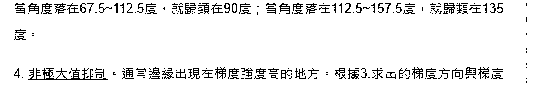

6.137931034482759


19.0


21.57894736842105


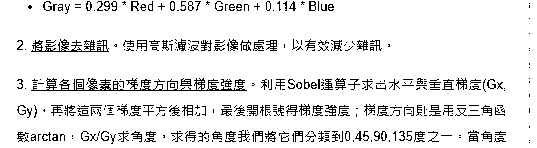

3.6283783783783785


19.11111111111111


11.85


11.052631578947368


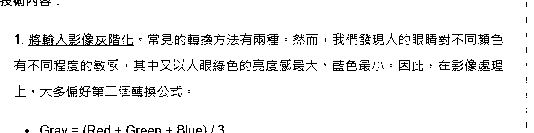

4.015037593984962


5.842105263157895


25.526315789473685


4.526315789473684


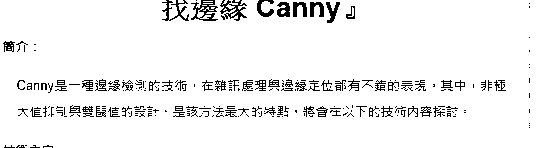

3.6283783783783785


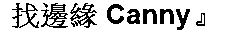

6.878787878787879


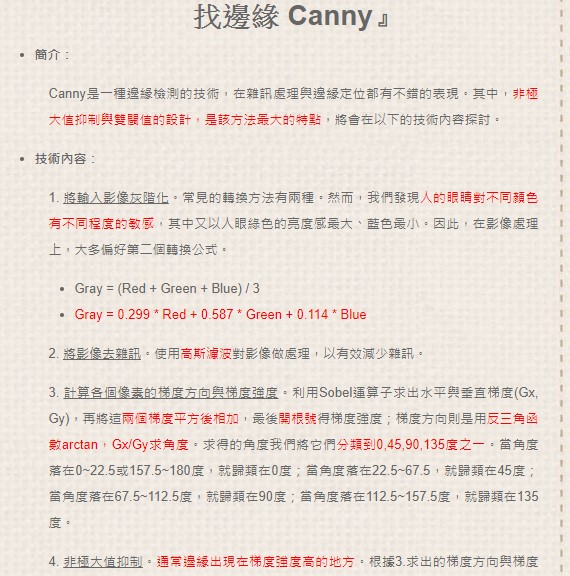

In [ ]:
img = cv2.imread('/content/test.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 利用Sobel邊緣檢測生成二值圖
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3)
# 二值化
ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

# 膨脹、腐蝕
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 9))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (24, 6))

# 膨脹一次，讓輪廓突出
dilation = cv2.dilate(binary, element2, iterations=1)

# 腐蝕一次，去掉細節
erosion = cv2.erode(dilation, element1, iterations=1)

# 再次膨脹，讓輪廓明顯一些
dilation2 = cv2.dilate(erosion, element2, iterations=2)

#  查詢輪廓和篩選文字區域
region = []
contours, hierarchy = cv2.findContours(dilation2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    cnt = contours[i]


    area = cv2.contourArea(cnt)
    if (area < 1000):
        continue


    rect = cv2.minAreaRect(cnt)
    print ("rect is: ")
    print (rect)


    box = cv2.boxPoints(rect)
    box = np.int0(box)


    height = abs(box[0][1] - box[2][1])
    width = abs(box[0][0] - box[2][0])


    if (height > width * 1.3):
        continue

    region.append(box)


round = 0
for box in region:
    '''round+=1
    if (round == 2):
      break
    if (i==1):
      cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
      print('-----------',box)
      cv2_imshow(img[box[1,1]:box[0,1],box[0,0]:box[2,0]])'''
    imgg = gray[box[1,1]:box[0,1],box[0,0]:box[2,0]]
    sobel = cv2.Sobel(imgg, cv2.CV_8U, 1, 0, ksize=3)
    ret, binary = cv2.threshold(imgg, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    cv2_imshow(binary)
    print(binary.shape[1]/binary.shape[0])

    '''for i in range(0,binary.shape[0],1):
      for j in range(0,binary.shape[1],1):
        cv2_imshow(binary[i:i+binary.shape[0]//5,j:j+binary.shape[1]//5*6])'''

cv2_imshow(img)
